<a href="https://colab.research.google.com/github/AoyamaHayato/shimosaka_final_problem1/blob/main/shimosaka_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv
import math

# Datasets

In [8]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

In [51]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

# Problem 1

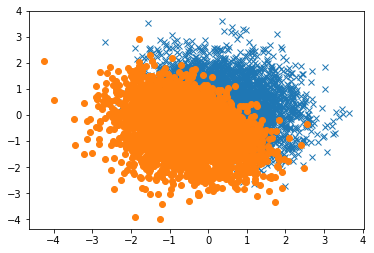

In [ ]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy


In [47]:
loss_hist_batch = [] # to store the history of loss J(w_t)

# implement batch steepest gradient method here

w_t = np.array([1,1,1,1])
lam = 0.05
alpha = 0.2

def J(w_t):
  summary1 = 0
  for i in range(200):
    summary1 += np.log(1 + np.exp(-1 * y_d4[i] * np.sum(w_t * x_d4[i,])))

  summary1 = summary1/200 + lam * np.sum(w_t*w_t)
  return summary1


def dJ(w_t):
  summary = np.array([0.0,0.0,0.0,0.0])
  for i in range(200):
    summary += -1 * y_d4[i] * x_d4[i,] *np.exp(-1 * y_d4[i] * np.sum(w_t * x_d4[i,]))/(1 + np.exp(-1 * y_d4[i] * np.sum(w_t * x_d4[i,])))

  d_J = summary/200 + lam * 2 * w_t
  return d_J

loss_hist_batch.append(J(w_t))
for i in range(100):
  w_t_next = w_t - alpha * dJ(w_t)
  loss_hist_batch.append(J(w_t_next))
  w_t = w_t_next

print(loss_hist_batch)

[1.0540814988072496, 1.0035474383823169, 0.9568487125506088, 0.913783631186513, 0.8741506902504372, 0.8377494024789904, 0.8043812636987638, 0.7738508056153703, 0.7459666795184512, 0.7205427147377297, 0.6973989007379816, 0.6763622513141334, 0.6572675216506426, 0.6399577620692227, 0.6242847043930999, 0.6101089868334086, 0.597300230604237, 0.5857369860810435, 0.5753065685761869, 0.5659048042330042, 0.5574357056820434, 0.5498110954426355, 0.5429501929699662, 0.5367791790144669, 0.5312307487558565, 0.5262436631061578, 0.5217623057015024, 0.5177362514454099, 0.5141198510297722, 0.5108718346353605, 0.5079549369861385, 0.50533554508274, 0.5029833692507123, 0.5008711375891048, 0.4989743134758969, 0.4972708354610789, 0.4957408786395737, 0.49436663642995055, 0.4931321215778951, 0.49202298514406484, 0.49102635221433477, 0.4901306730779855, 0.4893255886488629, 0.48860180895008015, 0.48795100353949, 0.487365702817039, 0.4868392092231346, 0.4863655174068474, 0.4859392425123246, 0.4855555557998538, 0.

In [48]:
loss_hist_newton = [] # to store the history of loss J(w_t)

# implement Newton based method here
w_t = np.array([1,1,1,1])
lam = 0.05

def ddJ(w_t):
  summary = 0
  for i in range(200):
    summary += y_d4[i]**2 * np.sum(x_d4[i,] * x_d4[i,]) * np.exp(-1 * y_d4[i] * np.sum(w_t * x_d4[i,]))/((1+np.exp(-1 * y_d4[i] * np.sum(w_t * x_d4[i,])))**2)

  summary = summary/200 + 2*lam
  return summary

loss_hist_newton.append(J(w_t))
for i in range(100):
  w_t_next = w_t - ddJ(w_t) * dJ(w_t) / J(w_t)
  loss_hist_newton.append(J(w_t_next))
  w_t = w_t_next

print(loss_hist_newton)


J_op = J(w_t)

[1.0540814988072496, 0.9248460333944702, 0.8022561969202762, 0.6930695799957698, 0.605383112035282, 0.5449532106026962, 0.5104735536094631, 0.4939899666999571, 0.4869525657794868, 0.4840719351106074, 0.48289112911876864, 0.4823973967832121, 0.482185604683284, 0.48209235440325215, 0.4820502777224291, 0.48203086625141933, 0.48202173467938475, 0.48201736618840685, 0.4820152463698574, 0.48201420542623763, 0.48201368922674903, 0.48201343118002427, 0.4820133013359539, 0.4820132356527328, 0.4820132022824837, 0.48201318526933545, 0.4820131765707914, 0.4820131721130224, 0.4820131698241835, 0.48201316864713845, 0.48201316804105404, 0.4820131677286332, 0.4820131675674436, 0.4820131674842178, 0.4820131674412183, 0.48201316741899125, 0.4820131674074962, 0.48201316740154904, 0.482013167398471, 0.48201316739687794, 0.48201316739605266, 0.4820131673956255, 0.48201316739540395, 0.48201316739528904, 0.4820131673952299, 0.48201316739519906, 0.4820131673951832, 0.4820131673951747, 0.48201316739517047, 0.4

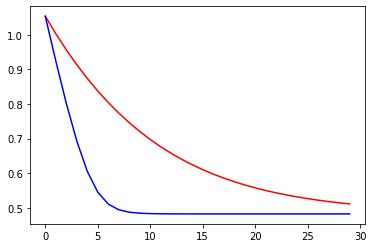

In [49]:
# plot the result
plt.plot(loss_hist_batch[0:30],color = 'red')
plt.plot(loss_hist_newton[0:30], color = 'blue')

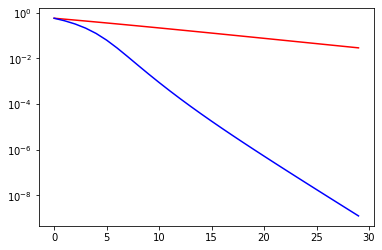

In [50]:
#Compare the performance
plt.yscale('log')
plt.plot(loss_hist_batch[0:30] - J_op,color = 'red')
plt.plot(loss_hist_newton[0:30] - J_op, color = 'blue')


In [53]:
#multiclass
loss_hist_batch_mul = [] # to store the history of loss J(w_t)

w_t = np.array([1,1,1,1])
lam = 0.05
alpha = 0.2

# implement batch steepest gradient method here

def J_mul(w_t):
  summary1 = 0
  for i in range(200):
    summary1 += np.log(1 + np.exp(-1 * y_d5[i] * np.sum(w_t * x_d5[i,])))

  summary1 = summary1/200 + lam * np.sum(w_t*w_t)
  return summary1


def dJ_mul(w_t):
  summary = np.array([0.0,0.0,0.0,0.0])
  for i in range(200):
    summary += -1 * y_d5[i] * x_d5[i,] *np.exp(-1 * y_d5[i] * np.sum(w_t * x_d5[i,]))/(1 + np.exp(-1 * y_d5[i] * np.sum(w_t * x_d5[i,])))

  d_J = summary/200 + lam * 2 * w_t
  return d_J

loss_hist_batch_mul.append(J_mul(w_t))
for i in range(100):
  w_t_next = w_t - alpha * dJ_mul(w_t)
  loss_hist_batch_mul.append(J_mul(w_t_next))
  w_t = w_t_next

print(loss_hist_batch_mul)

[1.0545179746725644, 1.0157587986339736, 0.9794162829237623, 0.945410993022406, 0.9136645670727972, 0.8840994820402007, 0.8566387956530641, 0.8312058503178269, 0.8077239319359979, 0.7861158864506957, 0.7663037089300718, 0.7482081324356429, 0.731748254831346, 0.7168412489534751, 0.7034022032958746, 0.6913441353090607, 0.6805782073247238, 0.671014157035547, 0.6625609327021185, 0.6551275010862675, 0.6486237770894817, 0.6429616112875057, 0.6380557668931919, 0.6338248214676296, 0.6301919397071871, 0.6270854795047255, 0.6244394113681618, 0.6221935484855168, 0.6202935991967169, 0.6186910641816632, 0.6173430069715007, 0.6162117287826041, 0.6152643779281999, 0.614472521119581, 0.6138116997427828, 0.6132609894585113, 0.6128025767967008, 0.6124213621764568, 0.6121045951791141, 0.611841545007277, 0.6116232068570796, 0.6114420433422113, 0.6112917590388821, 0.6111671055669099, 0.6110637142856645, 0.6109779535788477, 0.610906807758168, 0.610847774776677, 0.6107987801652195, 0.6107581048588258, 0.6107

In [54]:
loss_hist_newton_mul = [] # to store the history of loss J(w_t)

w_t = np.array([1,1,1,1])
lam = 0.05

def ddJ_mul(w_t):
  summary = 0
  for i in range(200):
    summary += y_d5[i]**2 * np.sum(x_d5[i,] * x_d5[i,]) * np.exp(-1 * y_d5[i] * np.sum(w_t * x_d5[i,]))/((1+np.exp(-1 * y_d5[i] * np.sum(w_t * x_d5[i,])))**2)

  summary = summary/200 + 2*lam
  return summary

loss_hist_newton_mul.append(J(w_t))
for i in range(100):
  w_t_next = w_t - ddJ_mul(w_t) * dJ_mul(w_t) / J_mul(w_t)
  loss_hist_newton_mul.append(J(w_t_next))
  w_t = w_t_next

print(loss_hist_newton_mul)
# implement Newton based method here

J_op_mul = J_mul(w_t)

[1.0540814988072496, 0.9865136480209056, 0.9230874126818924, 0.8684105365586692, 0.8296061260959416, 0.8132889534296824, 0.8130794519714531, 0.8129454297100883, 0.8121492997006987, 0.8117238862435583, 0.8115286134948538, 0.8114439135235643, 0.8114072974523939, 0.8113915511651805, 0.8113847756589201, 0.8113818622326527, 0.8113806092401432, 0.8113800704205377, 0.8113798387044895, 0.8113797390584948, 0.8113796962068881, 0.8113796777791212, 0.8113796698544913, 0.8113796664466064, 0.8113796649810889, 0.8113796643508617, 0.8113796640798412, 0.811379663963291, 0.8113796639131718, 0.8113796638916178, 0.8113796638823486, 0.8113796638783627, 0.8113796638766486, 0.8113796638759121, 0.8113796638755942, 0.8113796638754582, 0.8113796638753992, 0.8113796638753742, 0.8113796638753642, 0.8113796638753592, 0.811379663875357, 0.8113796638753564, 0.8113796638753563, 0.811379663875356, 0.8113796638753559, 0.8113796638753559, 0.8113796638753559, 0.8113796638753559, 0.8113796638753559, 0.8113796638753559, 0.

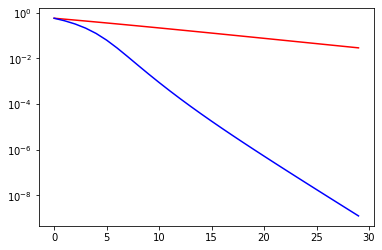

In [55]:
plt.yscale('log')
plt.plot(loss_hist_batch[0:30] - J_op,color = 'red')
plt.plot(loss_hist_newton[0:30] - J_op, color = 'blue')